## Resume Screening using SVM and KNN

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
resume_data = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
resume_data['cleaned_resume'] = ''
resume_data.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [5]:
print ("Displaying the distinct categories of resume -")
print(resume_data['Category'].unique())
len(resume_data['Category'].unique())

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


25

In [6]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print(resume_data['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
ETL Developer                40
Sales                        40
Mechanical Engineer          40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


In [9]:
resume_data.shape

(962, 3)

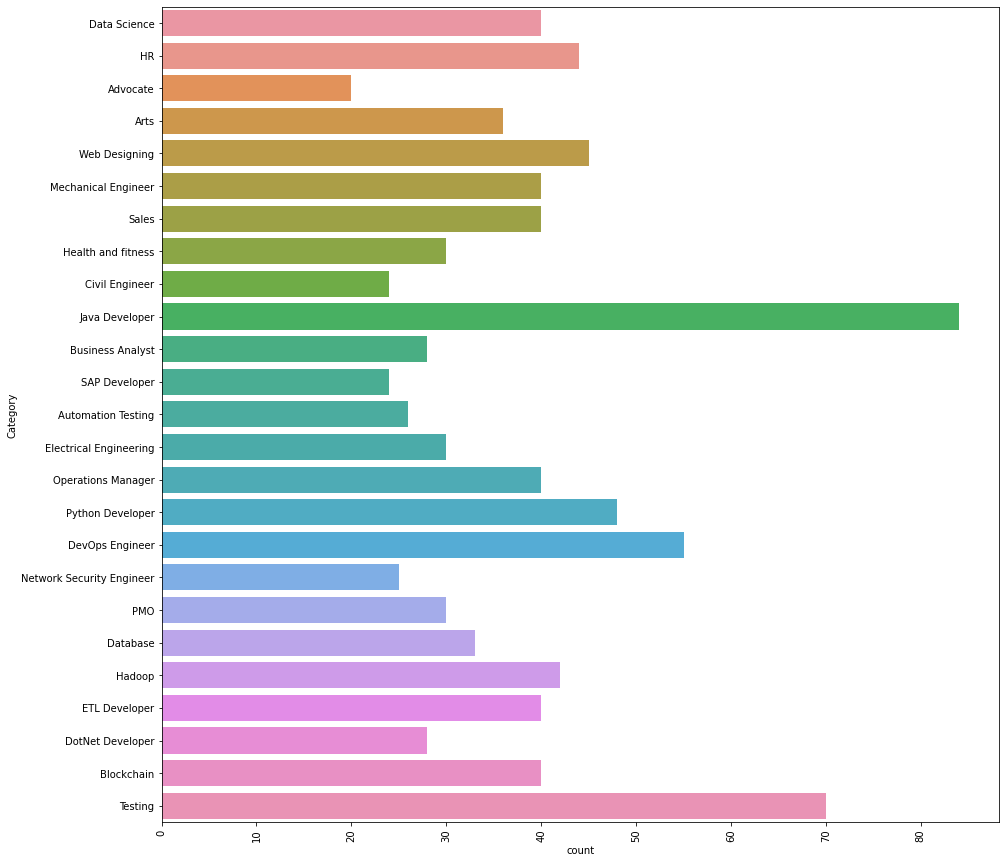

In [8]:
import seaborn as sns

# Visualizing the number of categories
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resume_data)

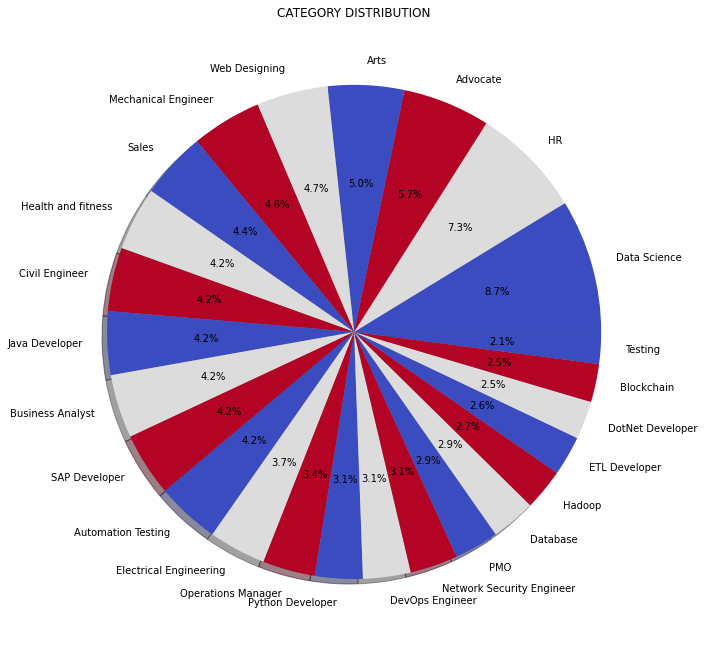

In [10]:
# Visualizing the category distribution
from matplotlib.gridspec import GridSpec

targetCounts = resume_data['Category'].value_counts()
targetLabels  = resume_data['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

### Data Cleaning
I will create a helper function to remove the URLs, hashtags, mentions, special letters, and punctuations:

In [11]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [12]:
resume_data['cleaned_resume'] = resume_data['Resume'].apply(lambda x: cleanResume(x))
resume_data.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


### Analyzing the words

In [16]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nazxa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nazxa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
print(oneSetOfStopWords)

totalWords =[]
Sentences = resume_data['Resume'].values
cleanedSentences = ""
print(len(Sentences))

for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
            
print(f"Total number of words: {len(totalWords)}")
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(f"Most common words: {mostcommon}")

# wc = WordCloud().generate(cleanedSentences)
# plt.figure(figsize=(15,15))
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.show()

{'wouldn', 'both', 'against', 'aren', 'he', 'his', "wasn't", 'when', 'won', "it's", 'a', 'down', "you'd", "she's", "needn't", 'few', 'does', 'where', 'doing', 'only', 'should', 'your', 'her', "isn't", 'not', 'this', 'to', 'are', 'all', 'themselves', "don't", 'why', 'because', 'couldn', 'was', 'been', 'these', 'so', 'again', "shan't", 'most', "aren't", "you've", 'those', "mustn't", 'through', 'off', 'y', 'herself', 'be', 'had', 'no', 'if', 'm', 'own', 'himself', 'further', 'didn', "haven't", 'can', "that'll", 'into', "hadn't", 'i', 'other', 'during', "mightn't", 'for', "doesn't", 'whom', 'between', 'who', 'doesn', 'is', 'then', 'some', 'o', 'yourselves', "shouldn't", 'ain', 'don', 'such', 'you', "you're", 'ma', 'their', 'than', "hasn't", 're', 'hasn', 'weren', 'yours', 'having', 'each', 'wasn', 'd', 'them', 'she', 'very', 'mustn', 'did', 'yourself', 'on', "should've", 'shan', "''", 'has', 'with', 'our', "didn't", "wouldn't", 'over', 'haven', "you'll", 'll', 'too', 'while', 'there', 's',

### Converting words into categorical values

In [24]:
from sklearn.preprocessing import LabelEncoder

var_mode = ['Category']
le = LabelEncoder()
for i in var_mode:
    resume_data[i] = le.fit_transform(resume_data[i])

In [26]:
resume_data

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


## Training the Model
I will use the one vs the rest classifier; KNeighborsClassifier. For this task, I will first split the data into training and test sets:

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [28]:
requiredText = resume_data['cleaned_resume'].values
requiredTarget = resume_data['Category'].values

In [29]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                  stop_words='english', max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures, requiredTarget, random_state=42, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [34]:
print(X_train)
X_train

  (0, 1498)	0.0600916655344522
  (0, 1486)	0.033747187529693835
  (0, 1484)	0.07070065074567579
  (0, 1483)	0.07663572740852052
  (0, 1476)	0.10010682067168342
  (0, 1473)	0.07849728099733443
  (0, 1451)	0.04027836869580996
  (0, 1442)	0.06559226576376377
  (0, 1426)	0.029508955157581732
  (0, 1423)	0.12306593444737327
  (0, 1392)	0.05976394137504206
  (0, 1388)	0.10259440513754849
  (0, 1381)	0.09633974479334574
  (0, 1374)	0.07135761149140281
  (0, 1372)	0.17761330028326755
  (0, 1365)	0.07961130657318378
  (0, 1360)	0.17900606266744964
  (0, 1358)	0.09509877500003021
  (0, 1328)	0.12766822835231922
  (0, 1317)	0.06411914354454007
  (0, 1305)	0.10288284264396907
  (0, 1269)	0.050314128311565856
  (0, 1267)	0.07663572740852052
  (0, 1259)	0.019335262509101815
  (0, 1240)	0.05081899413529008
  :	:
  (768, 1483)	0.2220139680553825
  (768, 1426)	0.08548754542094511
  (768, 1378)	0.21636765664707489
  (768, 1260)	0.08935916649360492
  (768, 1259)	0.05601432253856175
  (768, 1100)	0.142127

<769x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 89025 stored elements in Compressed Sparse Row format>

### Predicting using KNN and SVM

In [36]:
# Using KNN Classifier

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.98

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.

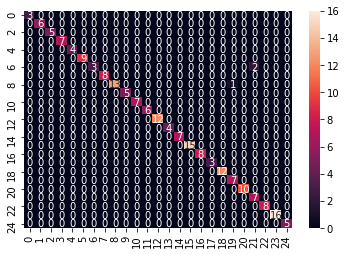

In [39]:
cm= confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True)

In [37]:
# Using SVM Classifier

SVM_Clf = OneVsRestClassifier(SVC())
SVM_Clf.fit(X_train, y_train)
pred = SVM_Clf.predict(X_test)
print('Accuracy of SVM Classifier on training set: {:.2f}'.format(SVM_Clf.score(X_train, y_train)))
print('Accuracy of SVM Classifier on test set: {:.2f}'.format(SVM_Clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (SVM_Clf, metrics.classification_report(y_test, pred)))

Accuracy of SVM Classifier on training set: 1.00
Accuracy of SVM Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=SVC()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14      

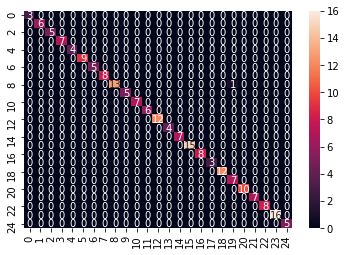

In [42]:
cm= confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)